In [ ]:
# for google colab
from google.colab import drive
# mount your Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd drive/MyDrive/Intro_to_AI/final_project

[Errno 2] No such file or directory: 'drive/MyDrive/Intro_to_AI/final_project'
/content/drive/MyDrive/Intro_to_AI/final_project


In [ ]:
!ls

clip_video.ipynb	  final_project.ipynb  one_minute.mp4	       video
final_project_code.ipynb  Noto_Sans_TC	       one_minute_output2.mp4


In [ ]:
!pip install open_clip_torch
!pip install moviepy # audio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import torch
import os
import open_clip
from open_clip import tokenizer

from google.colab.patches import cv2_imshow

import os
import skimage
import IPython.display
import matplotlib.pyplot as plt
from PIL import Image
import cv2
from collections import OrderedDict

In [ ]:
INPUT_FILE_NAME = 'video/One Minute Film/y2mate.com - 6 AM  Film Riot  One Minute Short Contest_1080p.mp4'
OUTPUT_FILE_NAME = 'one_minute_output2.mp4'
TOP = 3

# images in skimage to use and their textual descriptions
descriptions = [
    "a car in a parking lot",
    "a man and a car",
    "two people standing beside the car",
    "a black woman's face",
    "a black man's face",
    "a man is walking while holding a box",
    "an iron chain",
    "a man hold an iron chain",
    "iron chain and boxes",
    "people sitting in the gym",
    "doors",
    "none"
]
descriptions = [
    "a clock",
    "Brew coffee using a coffee machine.",
    "Pour the coffee into the cup." ,
    "The bread is on the plate.",
    "Add the cereal to the bowl.",
    "Add sugar to the cup.",
    "Use a cup to drink coffee.",
    "a man's face",
    "a woman's face",
    "Showerhead.",
    "none",
    "Door handle.",
    "There is a printer and some documents on the table.",
    "There is a computer and a keyboard on the table.",
    "The files are on the table.",
    "A person is using the mouse."
    "Typing on the keyboard.",
    "A person is holding some documents in their hand.",
    "Highlighting on the documents.",
    "answer a phone call.",
    "A man is lying on the bed, holding a book in his hand.",
    "A woman is lying on the bed, holding a book in his hand.",
    "A man is lying on the bed",
    "A man is getting up from the bed.",
    "A woman is getting up from the bed.",
    "A woman is walking",
    "grass and trees.",
    "A man is walking on the grass.",
    "A man is reading a book.",
    "A woman takes out a book from her handbag.",
    "A man is sitting on the bench.",
    "A woman is sitting on the bench"
]

In [ ]:
model, _, preprocess = open_clip.create_model_and_transforms('convnext_base_w', pretrained='laion2b_s13b_b82k_augreg')
preprocess

Compose(
    Resize(size=256, interpolation=bicubic, max_size=None, antialias=warn)
    CenterCrop(size=(256, 256))
    <function _convert_to_rgb at 0x7f126351ab00>
    ToTensor()
    Normalize(mean=(0.48145466, 0.4578275, 0.40821073), std=(0.26862954, 0.26130258, 0.27577711))
)

In [ ]:
def clip_video(video_path):
    # Load the video
    cap = cv2.VideoCapture(video_path)

    # Variables to keep track of frame count and extracted frame index
    frame_count = 0

    extracted_frames_left = []  # List to store the extracted frames
    extracted_frames_right = []
    all_frames = []
    while True:
        # Read a frame from the video
        ret, frame = cap.read()

        if not ret:
            break
        all_frames.append(frame)
        # Extract one frame for every 24 frames
        if frame_count % 24 == 0:
            extracted_frames_right.append(frame[:, frame.shape[1]//2:])
            extracted_frames_left.append(frame[:, :frame.shape[1]//2])

        frame_count += 1

    # Release the video capture object
    cap.release()
    return extracted_frames_left, extracted_frames_right, all_frames


In [ ]:
extracted_frames_left, extracted_frames_right, all_frames = clip_video(INPUT_FILE_NAME)

In [ ]:
'''
save frame
'''
# output_path = 'video/clip/'
# for i in range(len(extracted_frames_left)):
#     file_name_left = output_path + 'left_' + str(i) + '.jpg'
#     file_name_right = output_path + 'right_' + str(i) + '.jpg'
#     cv2.imwrite(file_name_left, extracted_frames_left[i])
#     cv2.imwrite(file_name_right, extracted_frames_right[i])

# for i in range(len(all_frames)):
#     file_name = output_path + 'frame_' + str(i) + '.jpg'
#     cv2.imwrite(file_name, all_frames[i])

'\nsave frame\n'

In [ ]:
# for i in range(len(extracted_frames_left)):
#     cv2_imshow(extracted_frames_left[i])
#     cv2_imshow(extracted_frames_right[i])


In [ ]:
# from google.colab.patches import cv2_imshow
# for i in range(len(extracted_frames)):
#     cv2_imshow(extracted_frames[i])

In [ ]:
!ls

clip_video.ipynb	  final_project.ipynb  one_minute.mp4	       video
final_project_code.ipynb  Noto_Sans_TC	       one_minute_output2.mp4


In [ ]:
'''
load frames
'''
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
 
# extracted_frames_left = [cv2.imread(input_path + left_frames) for left_frames in os.listdir(input_path) if left_frames.startswith("left")]
# extracted_frames_right = [cv2.imread(input_path + right_frames) for right_frames in os.listdir(input_path) if right_frames.startswith("right")]
# load_all_frames = [cv2.imread(input_path + frames) for frames in os.listdir(input_path) if frames.startswith("frame")]

original_images = []
images = []


for image1, image2 in zip(extracted_frames_left, extracted_frames_right):
    frame_rgb1 = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)
    image1 = Image.fromarray(frame_rgb1)

    frame_rgb2 = cv2.cvtColor(image2, cv2.COLOR_BGR2RGB)
    image2 = Image.fromarray(frame_rgb2)

    original_images.append(image1)
    images.append(preprocess(image1))
    original_images.append(image2)
    images.append(preprocess(image2))


In [ ]:
# load all frames
# input_path = 'video/clip/'

# all_frames = [cv2.imread(input_path + frames) for frames in os.listdir(input_path) if frames.startswith("frame")]
# all_frames = []

# for image in load_all_frames:
#     frame_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
#     image = Image.fromarray(frame_rgb)

#     all_frames.append(image)

In [ ]:

# original_images = []
# images = []
# texts = []
# plt.figure(figsize=(16, 5))

# image_path = 'video/coach_Carter'
# for filename in [filename for filename in os.listdir(image_path) if filename.endswith(".png") or filename.endswith(".jpg")]:
#     name = os.path.splitext(filename)[0]
#     image = Image.open(os.path.join(image_path, filename)).convert("RGB")
#     plt.subplot(4, 5, len(images) + 1)
#     plt.imshow(image)
#     plt.title(f"{filename}\n{descriptions[name]}")
#     plt.xticks([])
#     plt.yticks([])

#     original_images.append(image)
#     images.append(preprocess(image))
#     texts.append(descriptions[name])
# plt.tight_layout()


In [ ]:
image_input = torch.tensor(np.stack(images))
text_tokens = tokenizer.tokenize(["This is " + desc for desc in descriptions])

In [ ]:
with torch.no_grad():
    image_features = model.encode_image(image_input).float()
    text_features = model.encode_text(text_tokens).float()

In [ ]:
image_features /= image_features.norm(dim=-1, keepdim=True)
text_features /= text_features.norm(dim=-1, keepdim=True)
similarity = text_features.cpu().numpy() @ image_features.cpu().numpy().T

In [ ]:
# for i in range(len(similarity)):
#     print(i, np.argmax(similarity[i]))

In [ ]:
# import csv

# def save_to_csv(data, file_path):
#     with open(file_path, 'w', newline='') as csvfile:
#         writer = csv.writer(csvfile)
#         writer.writerows(data)

# save_to_csv(similarity, 'one_minute_similarity.csv')

In [ ]:
# import csv

# def load_from_csv(file_path):
#     data = []
#     with open(file_path, 'r') as csvfile:
#         reader = csv.reader(csvfile)
#         for row in reader:
#             data.append(row)
#     return data

# # Load the CSV file into a 2D array
# similarity = load_from_csv('one_minute_similarity.csv')
# similarity = np.array(similarity)



In [ ]:
def show_Cosinesimilarity(descriptions, original_images, similarity):
    count = len(descriptions)

    plt.figure(figsize=(20, 20))
    plt.imshow(similarity, vmin=0.1, vmax=0.3)
    # plt.colorbar()
    plt.yticks(range(count), descriptions, fontsize=8)
    plt.xticks([])
    for i, image in enumerate(original_images[:10]):
        plt.imshow(image, extent=(i - 0.5, i + 0.5, -1.6, -0.6), origin="lower")
    for x in range(similarity.shape[1]):
        for y in range(similarity.shape[0]):
            plt.text(x, y, f"{similarity[y, x]:.2f}", ha="center", va="center", size=8)

    for side in ["left", "top", "right", "bottom"]:
      plt.gca().spines[side].set_visible(False)

    plt.xlim([-0.5, count - 0.5])
    plt.ylim([count + 0.5, -2])

    #plt.title("Cosine similarity between text and image features", size=10)

In [ ]:
interval = [i for i in range(0, len(original_images), 10)] + [len(original_images)]


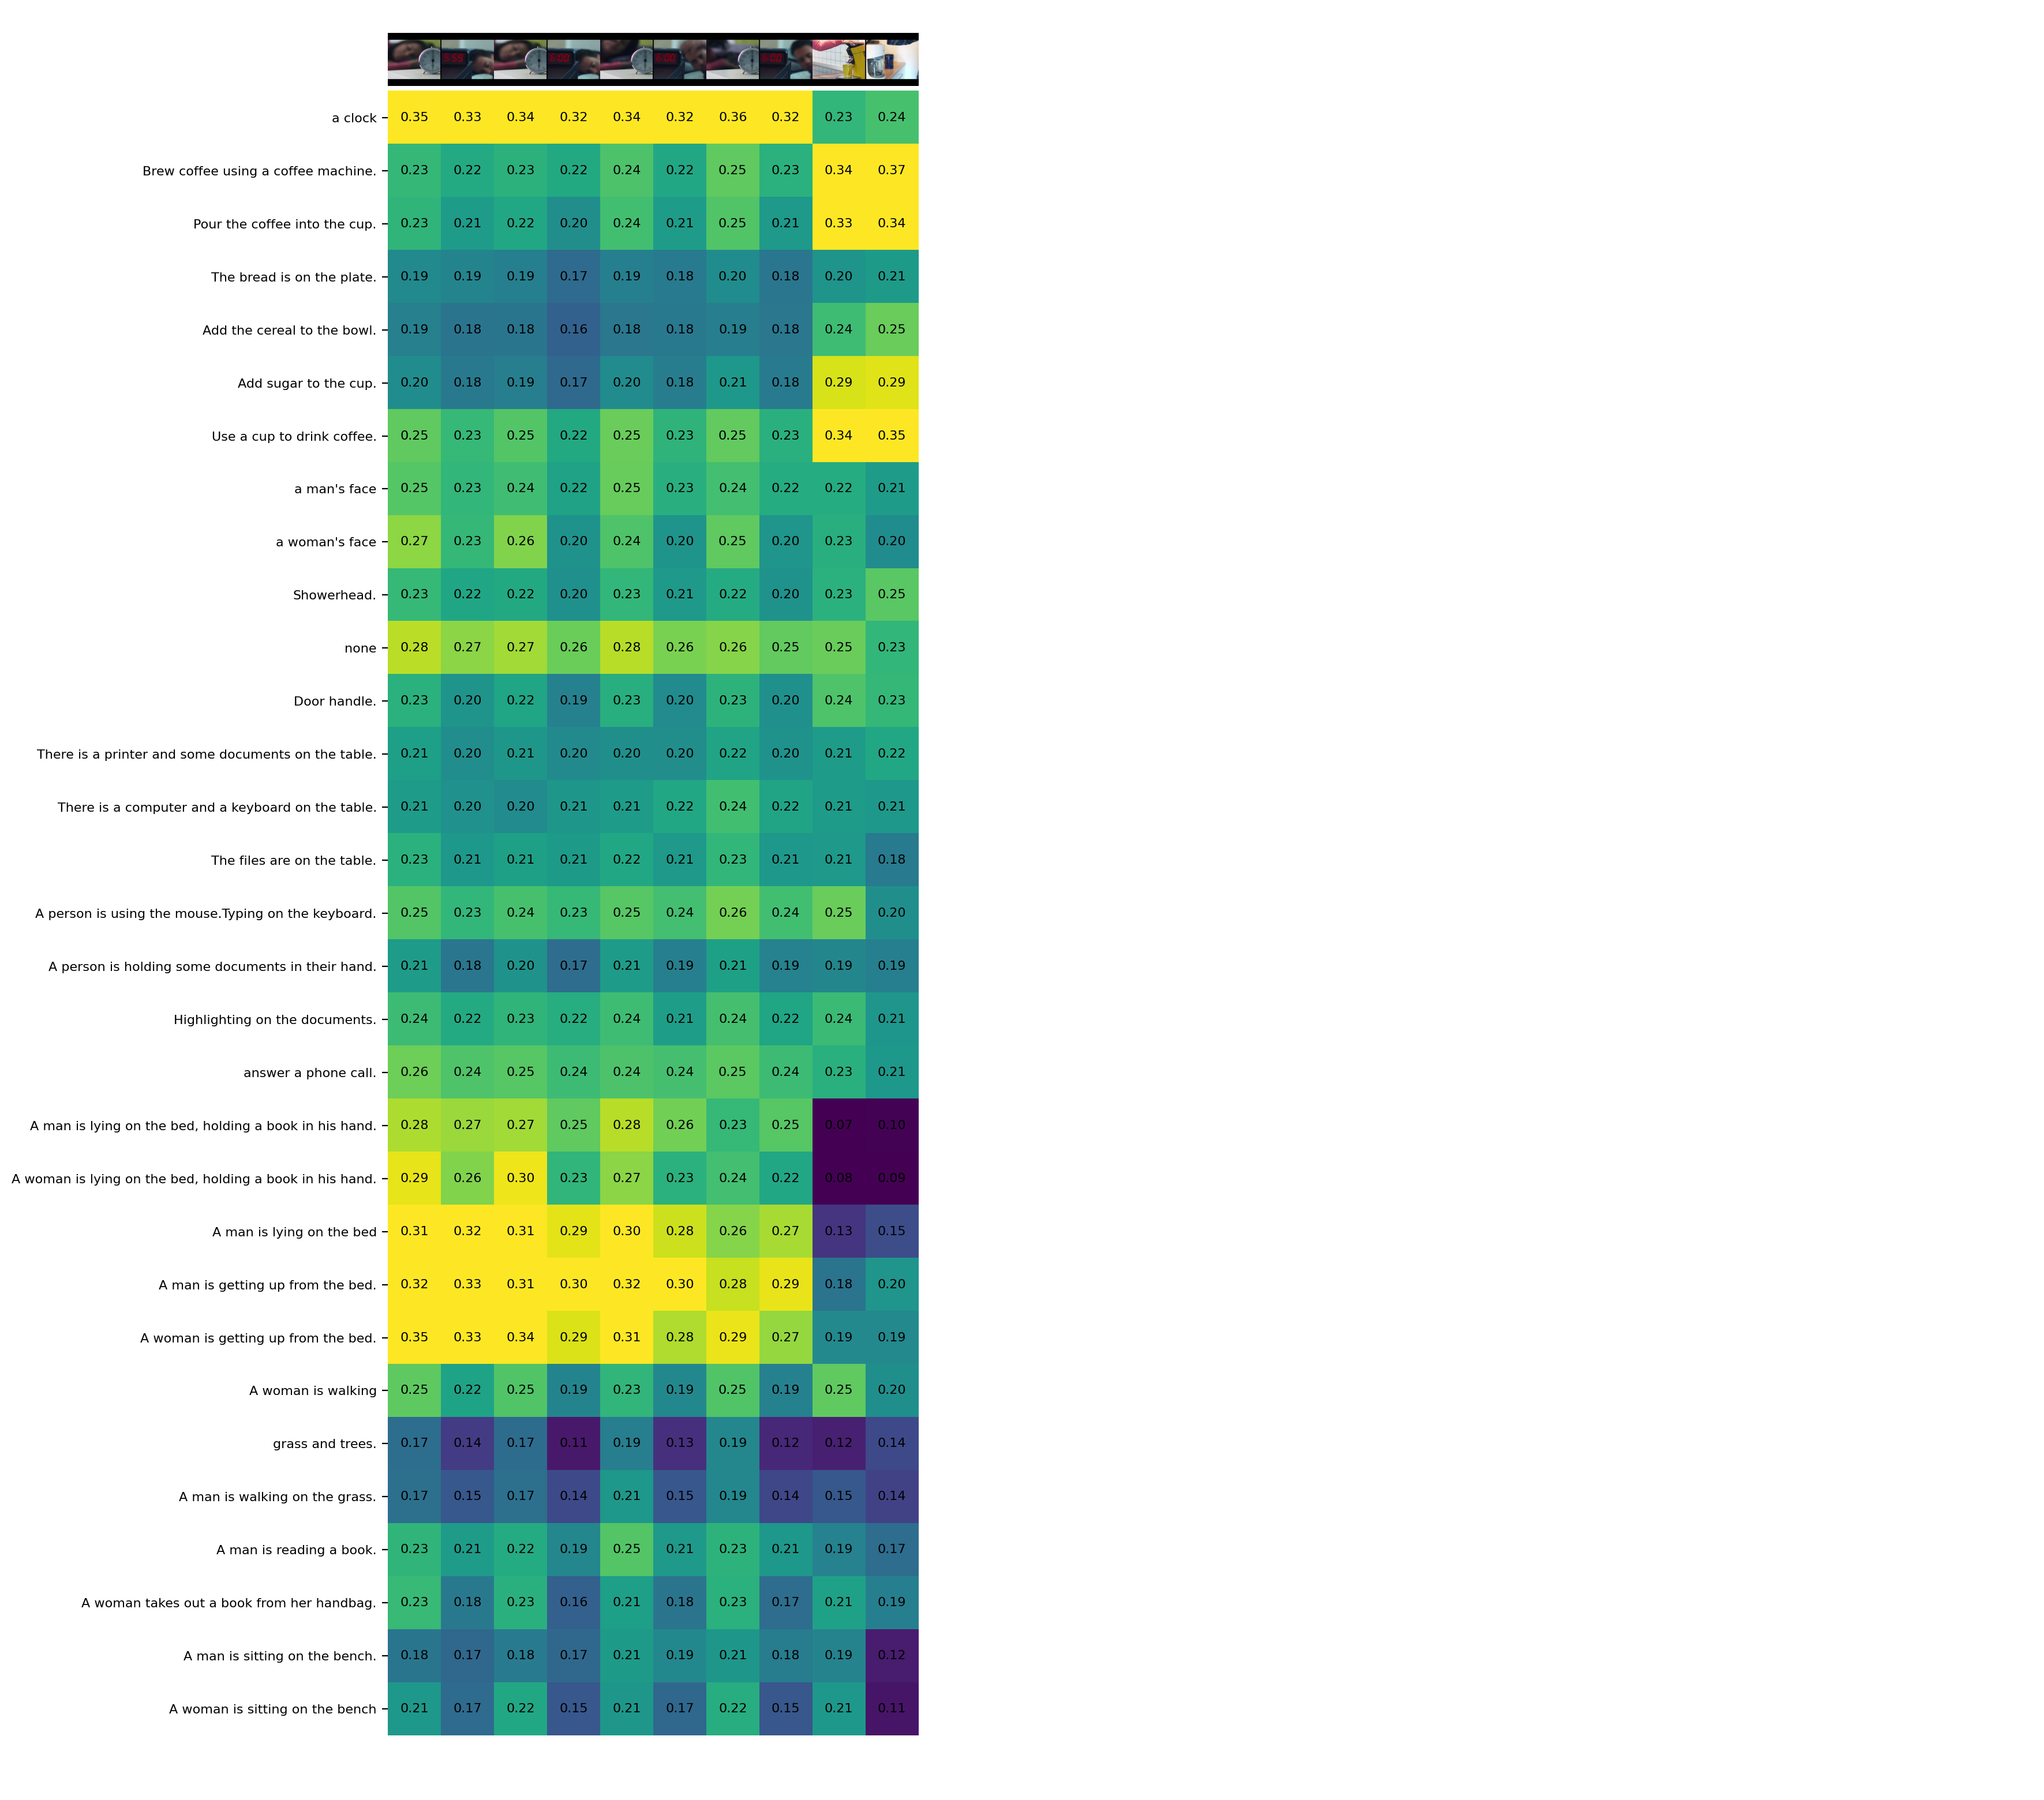

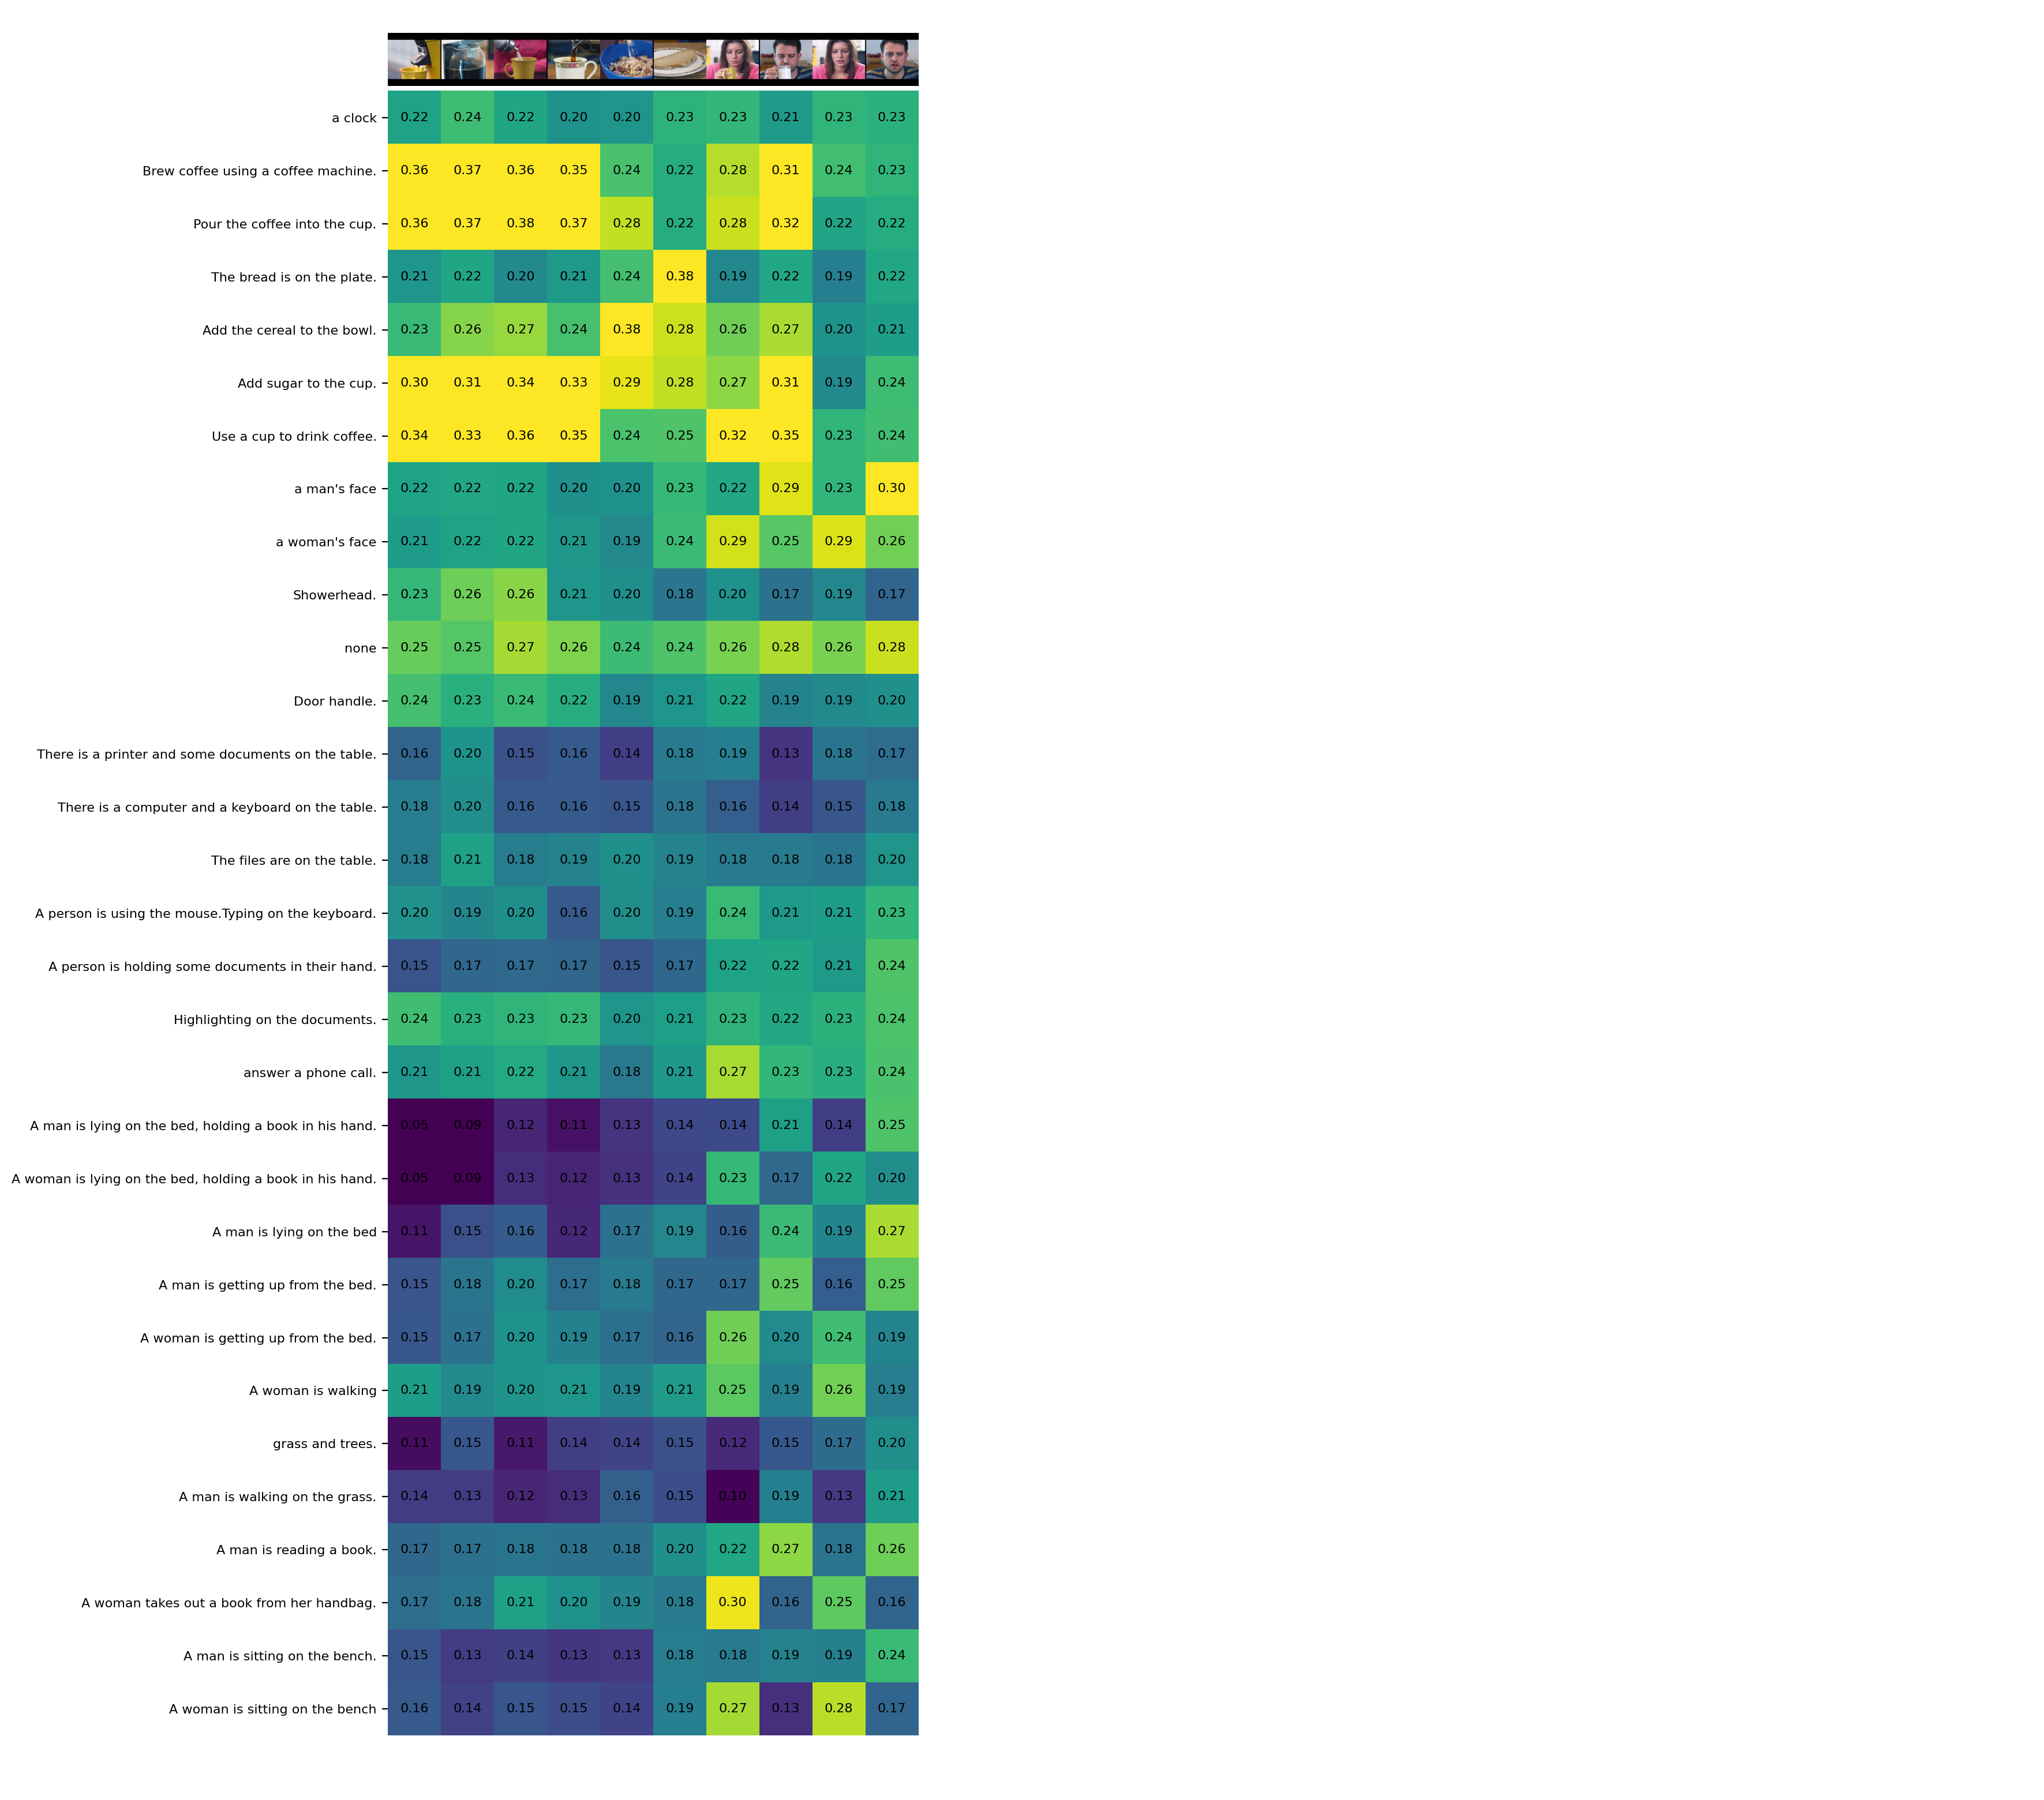

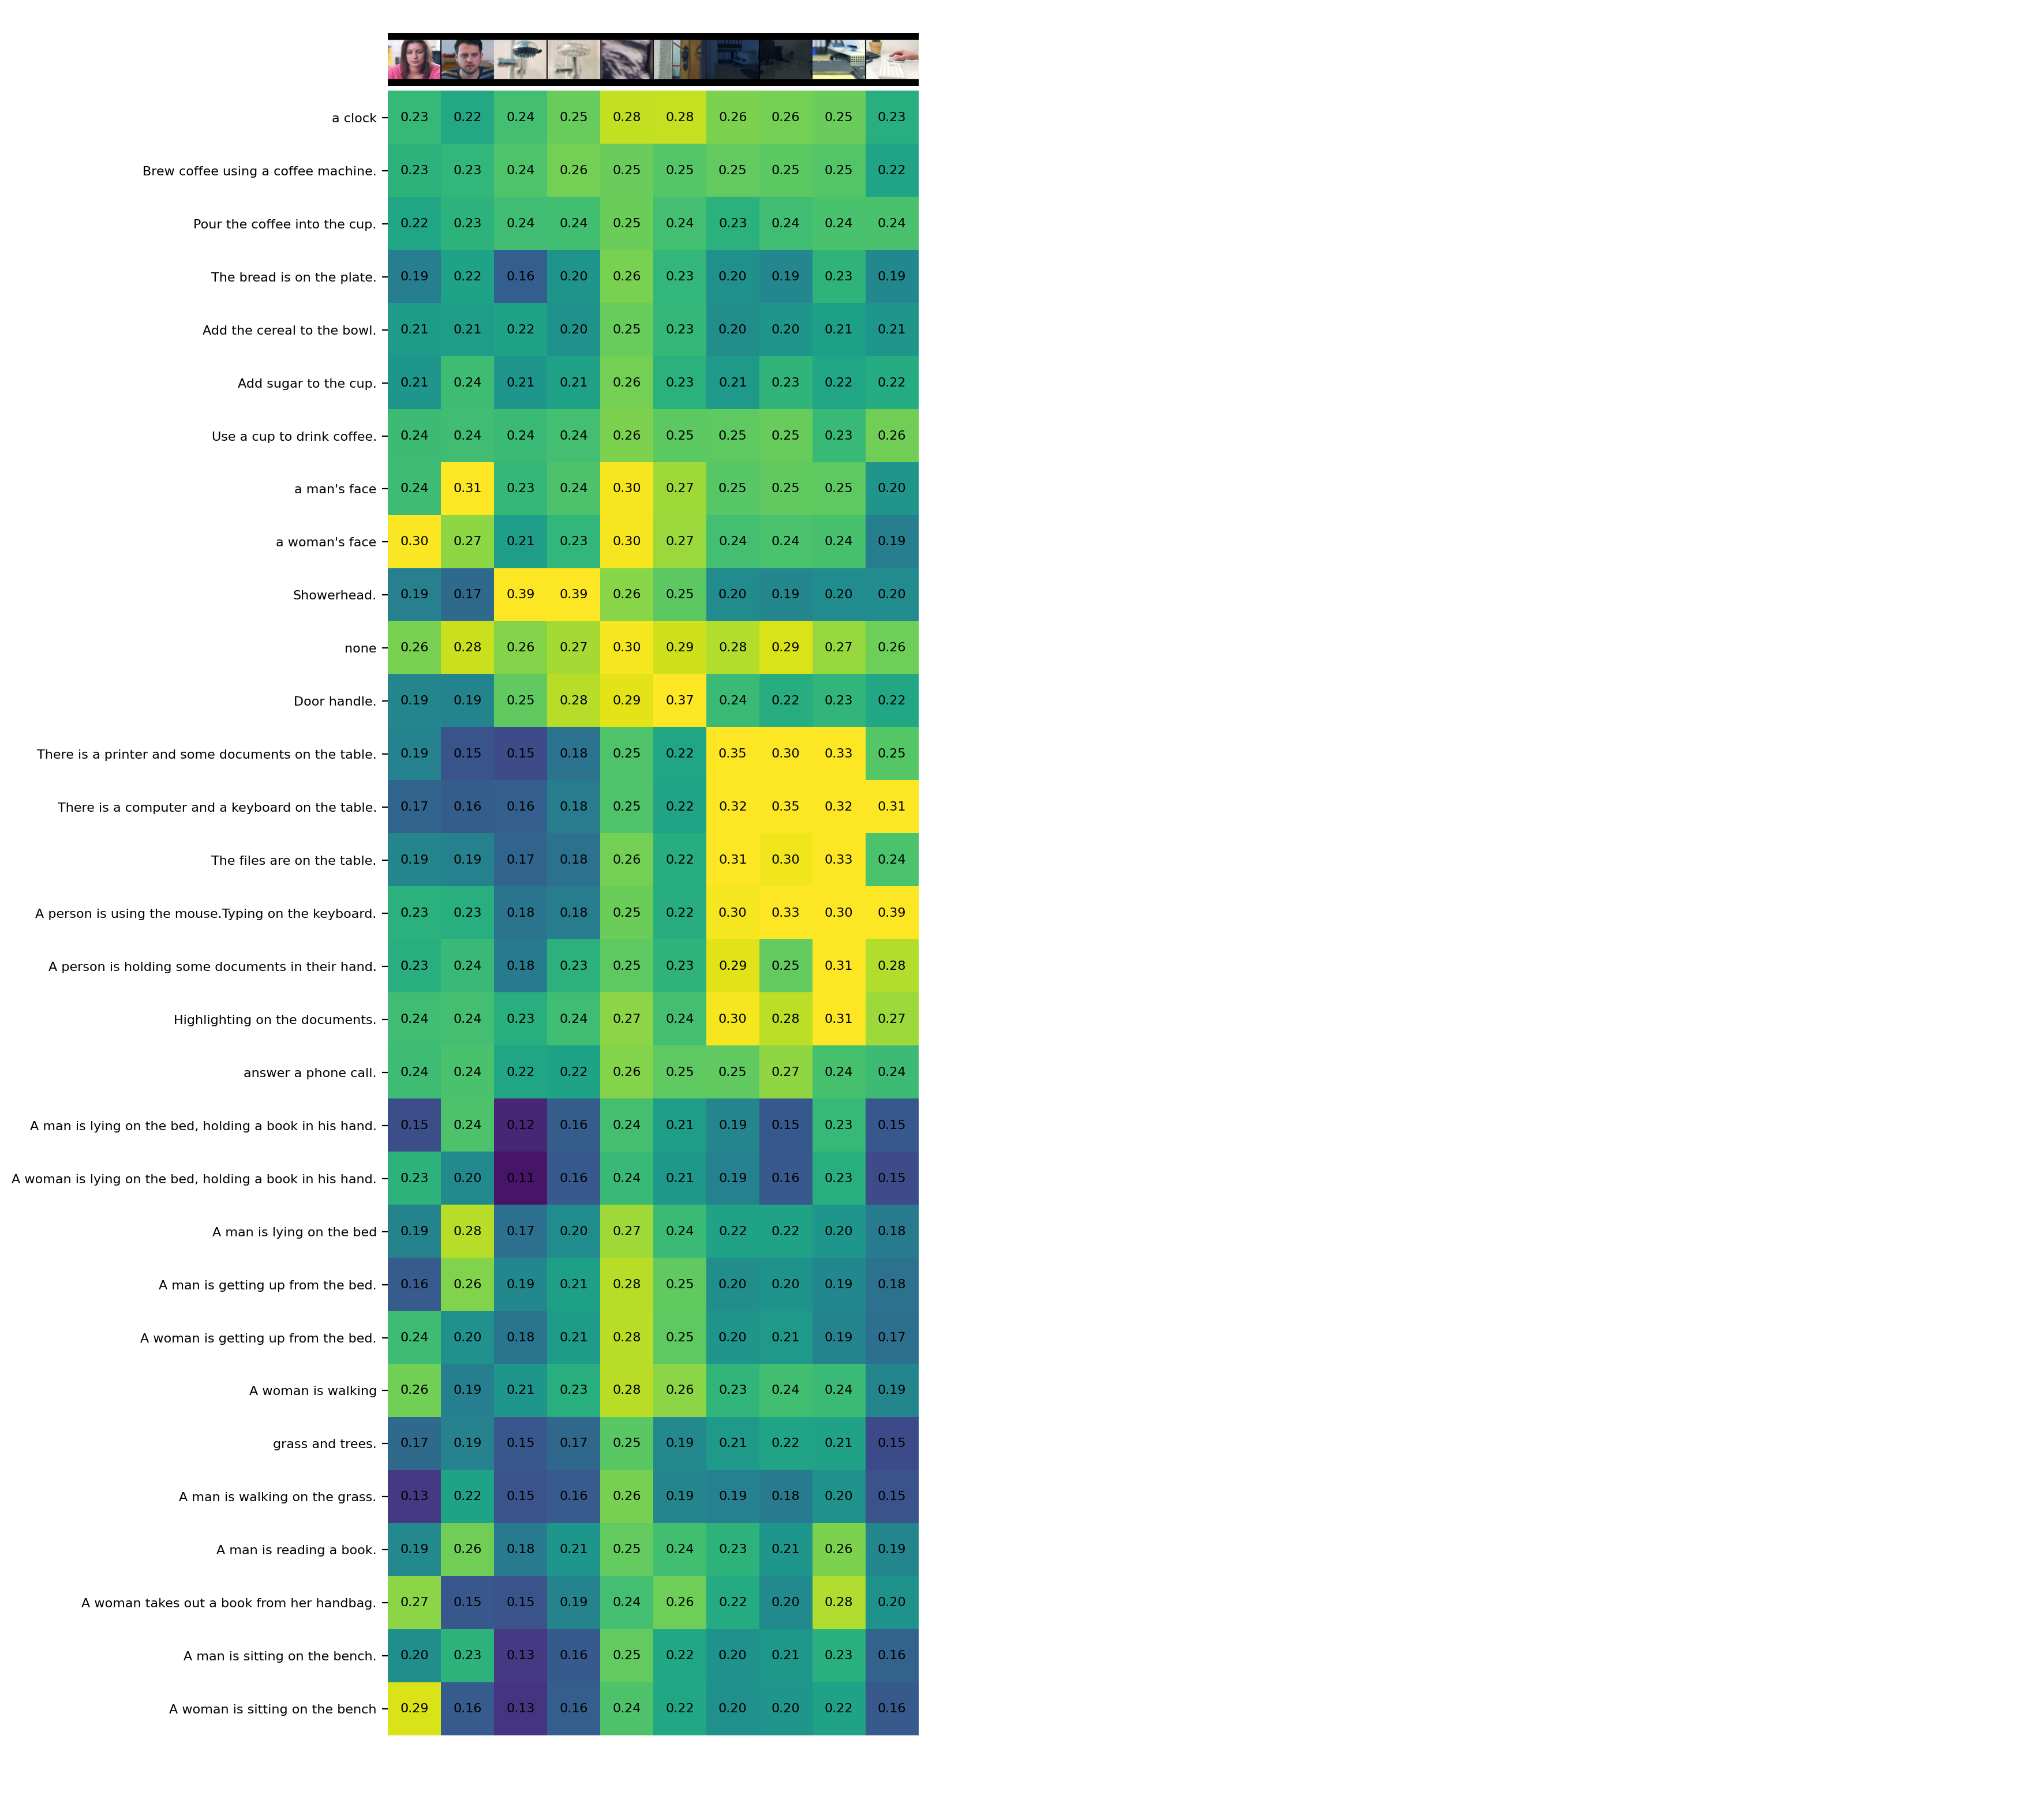

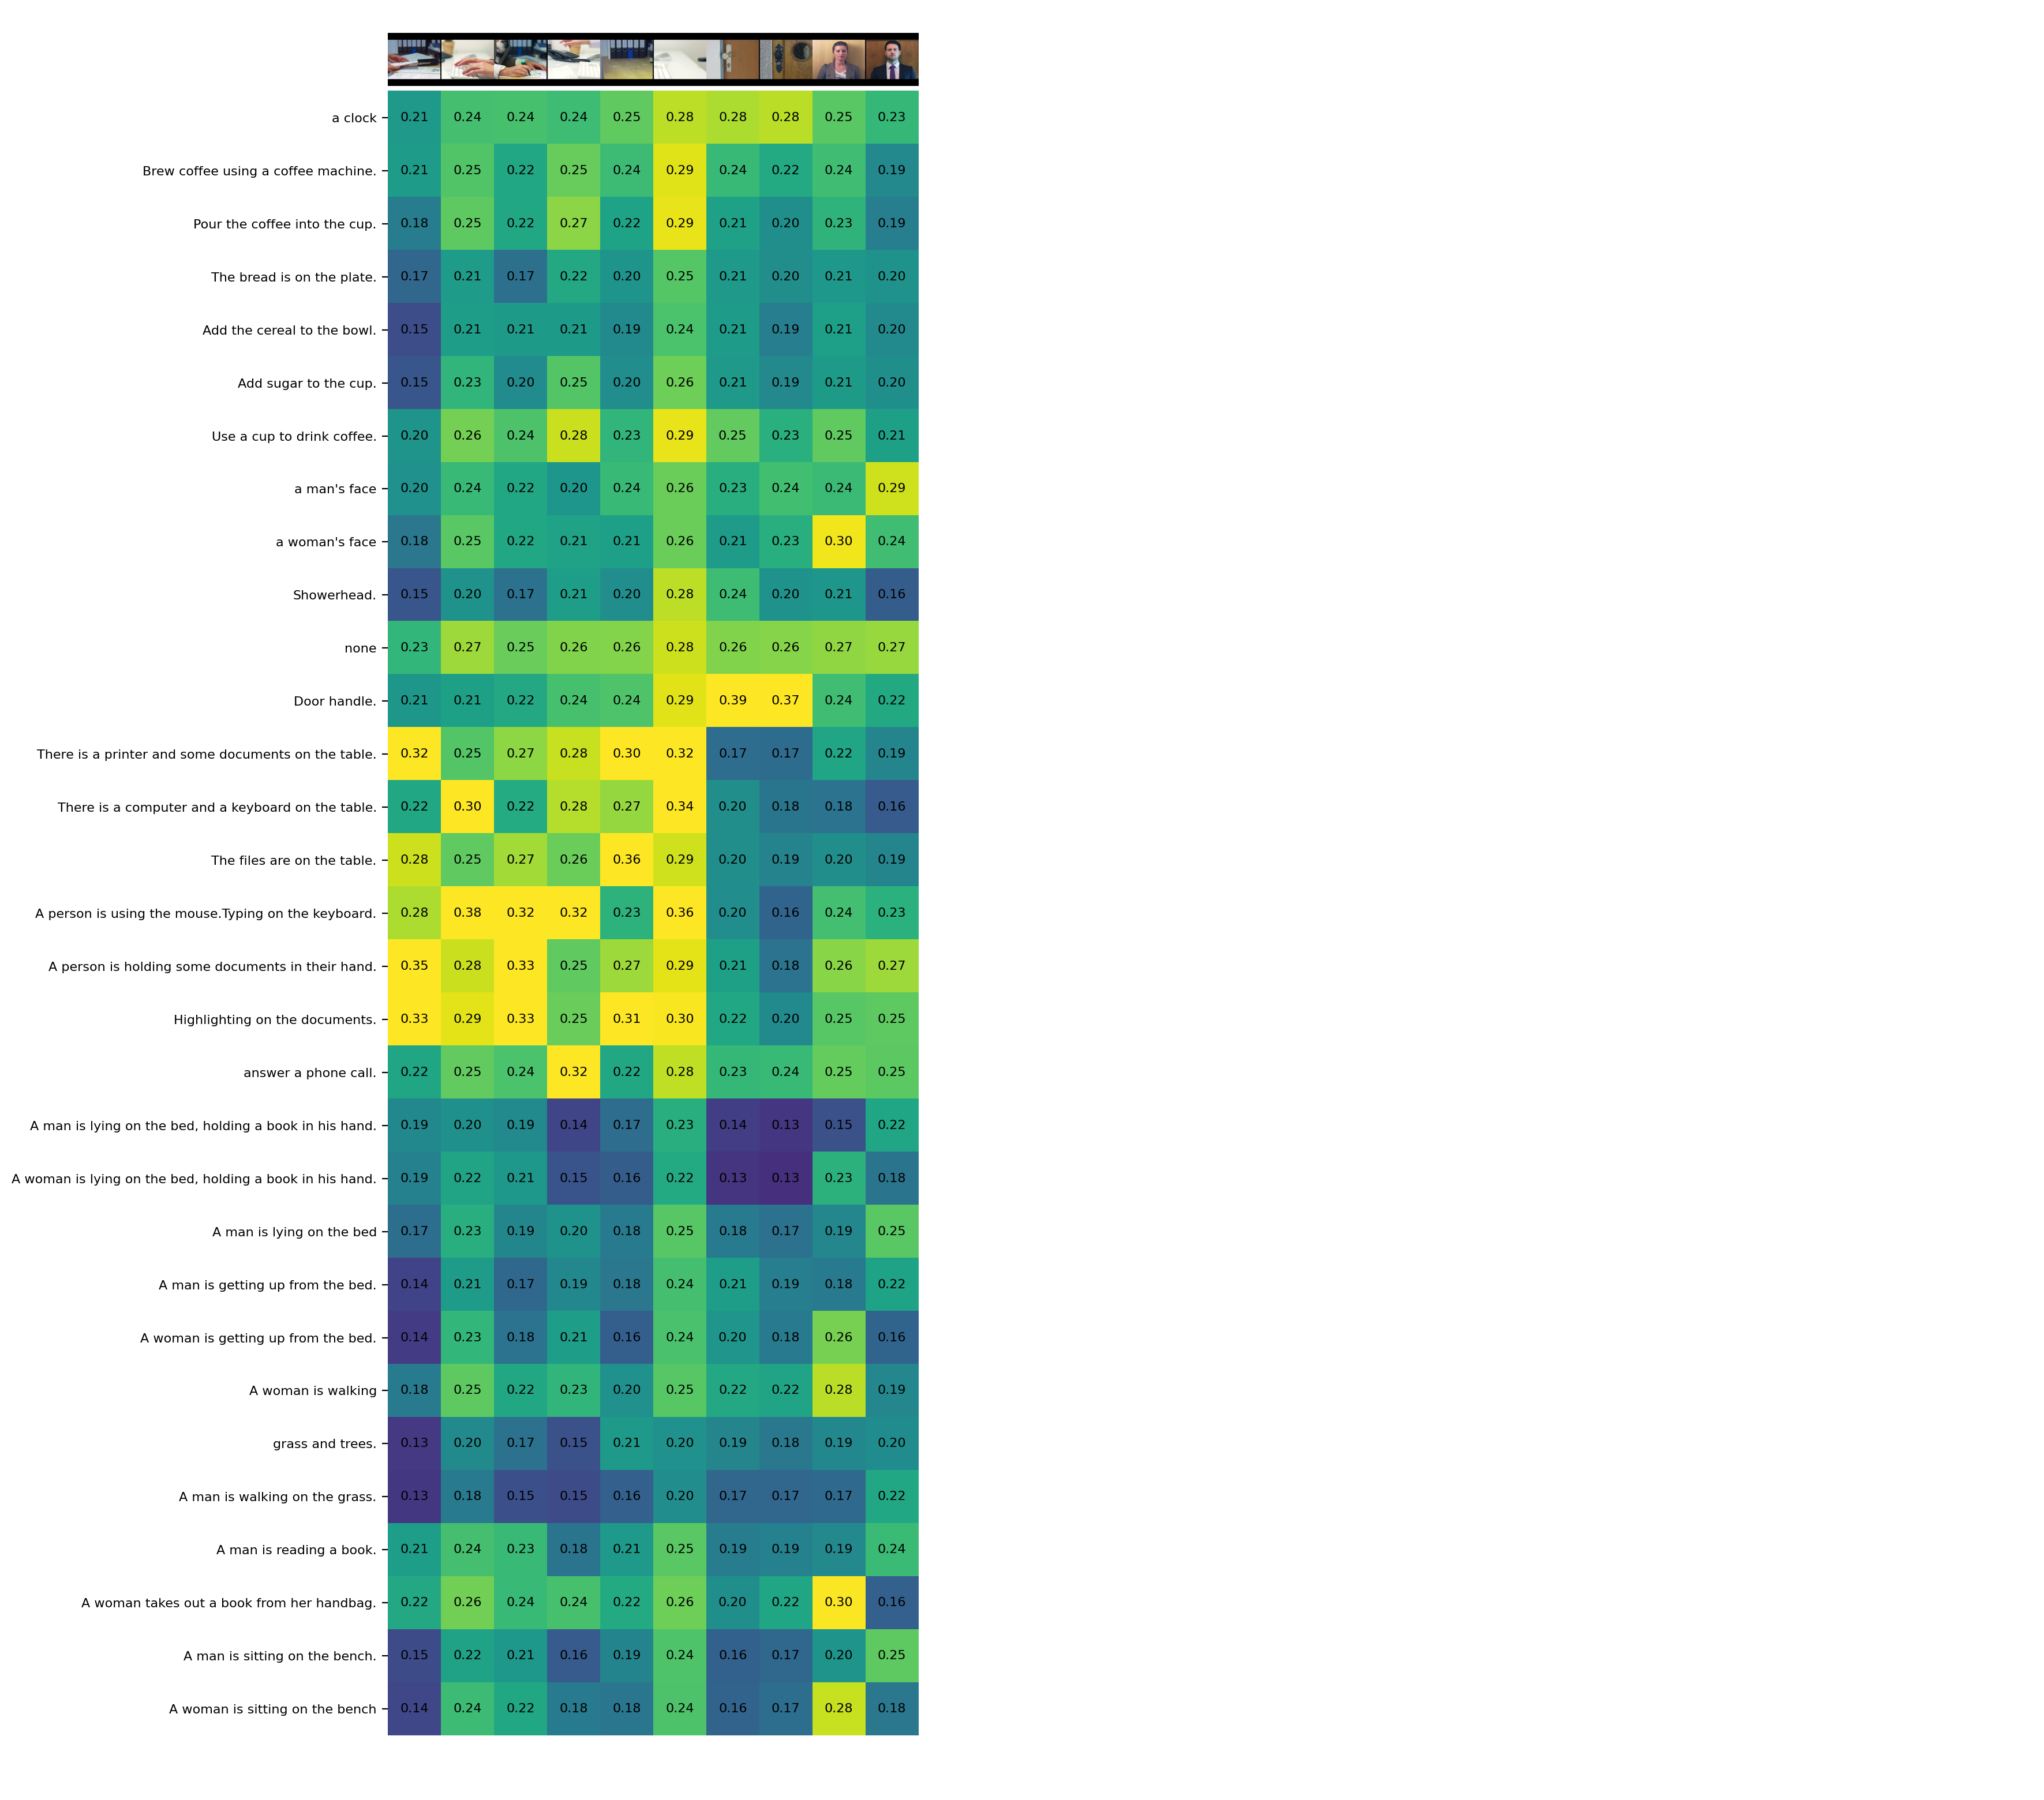

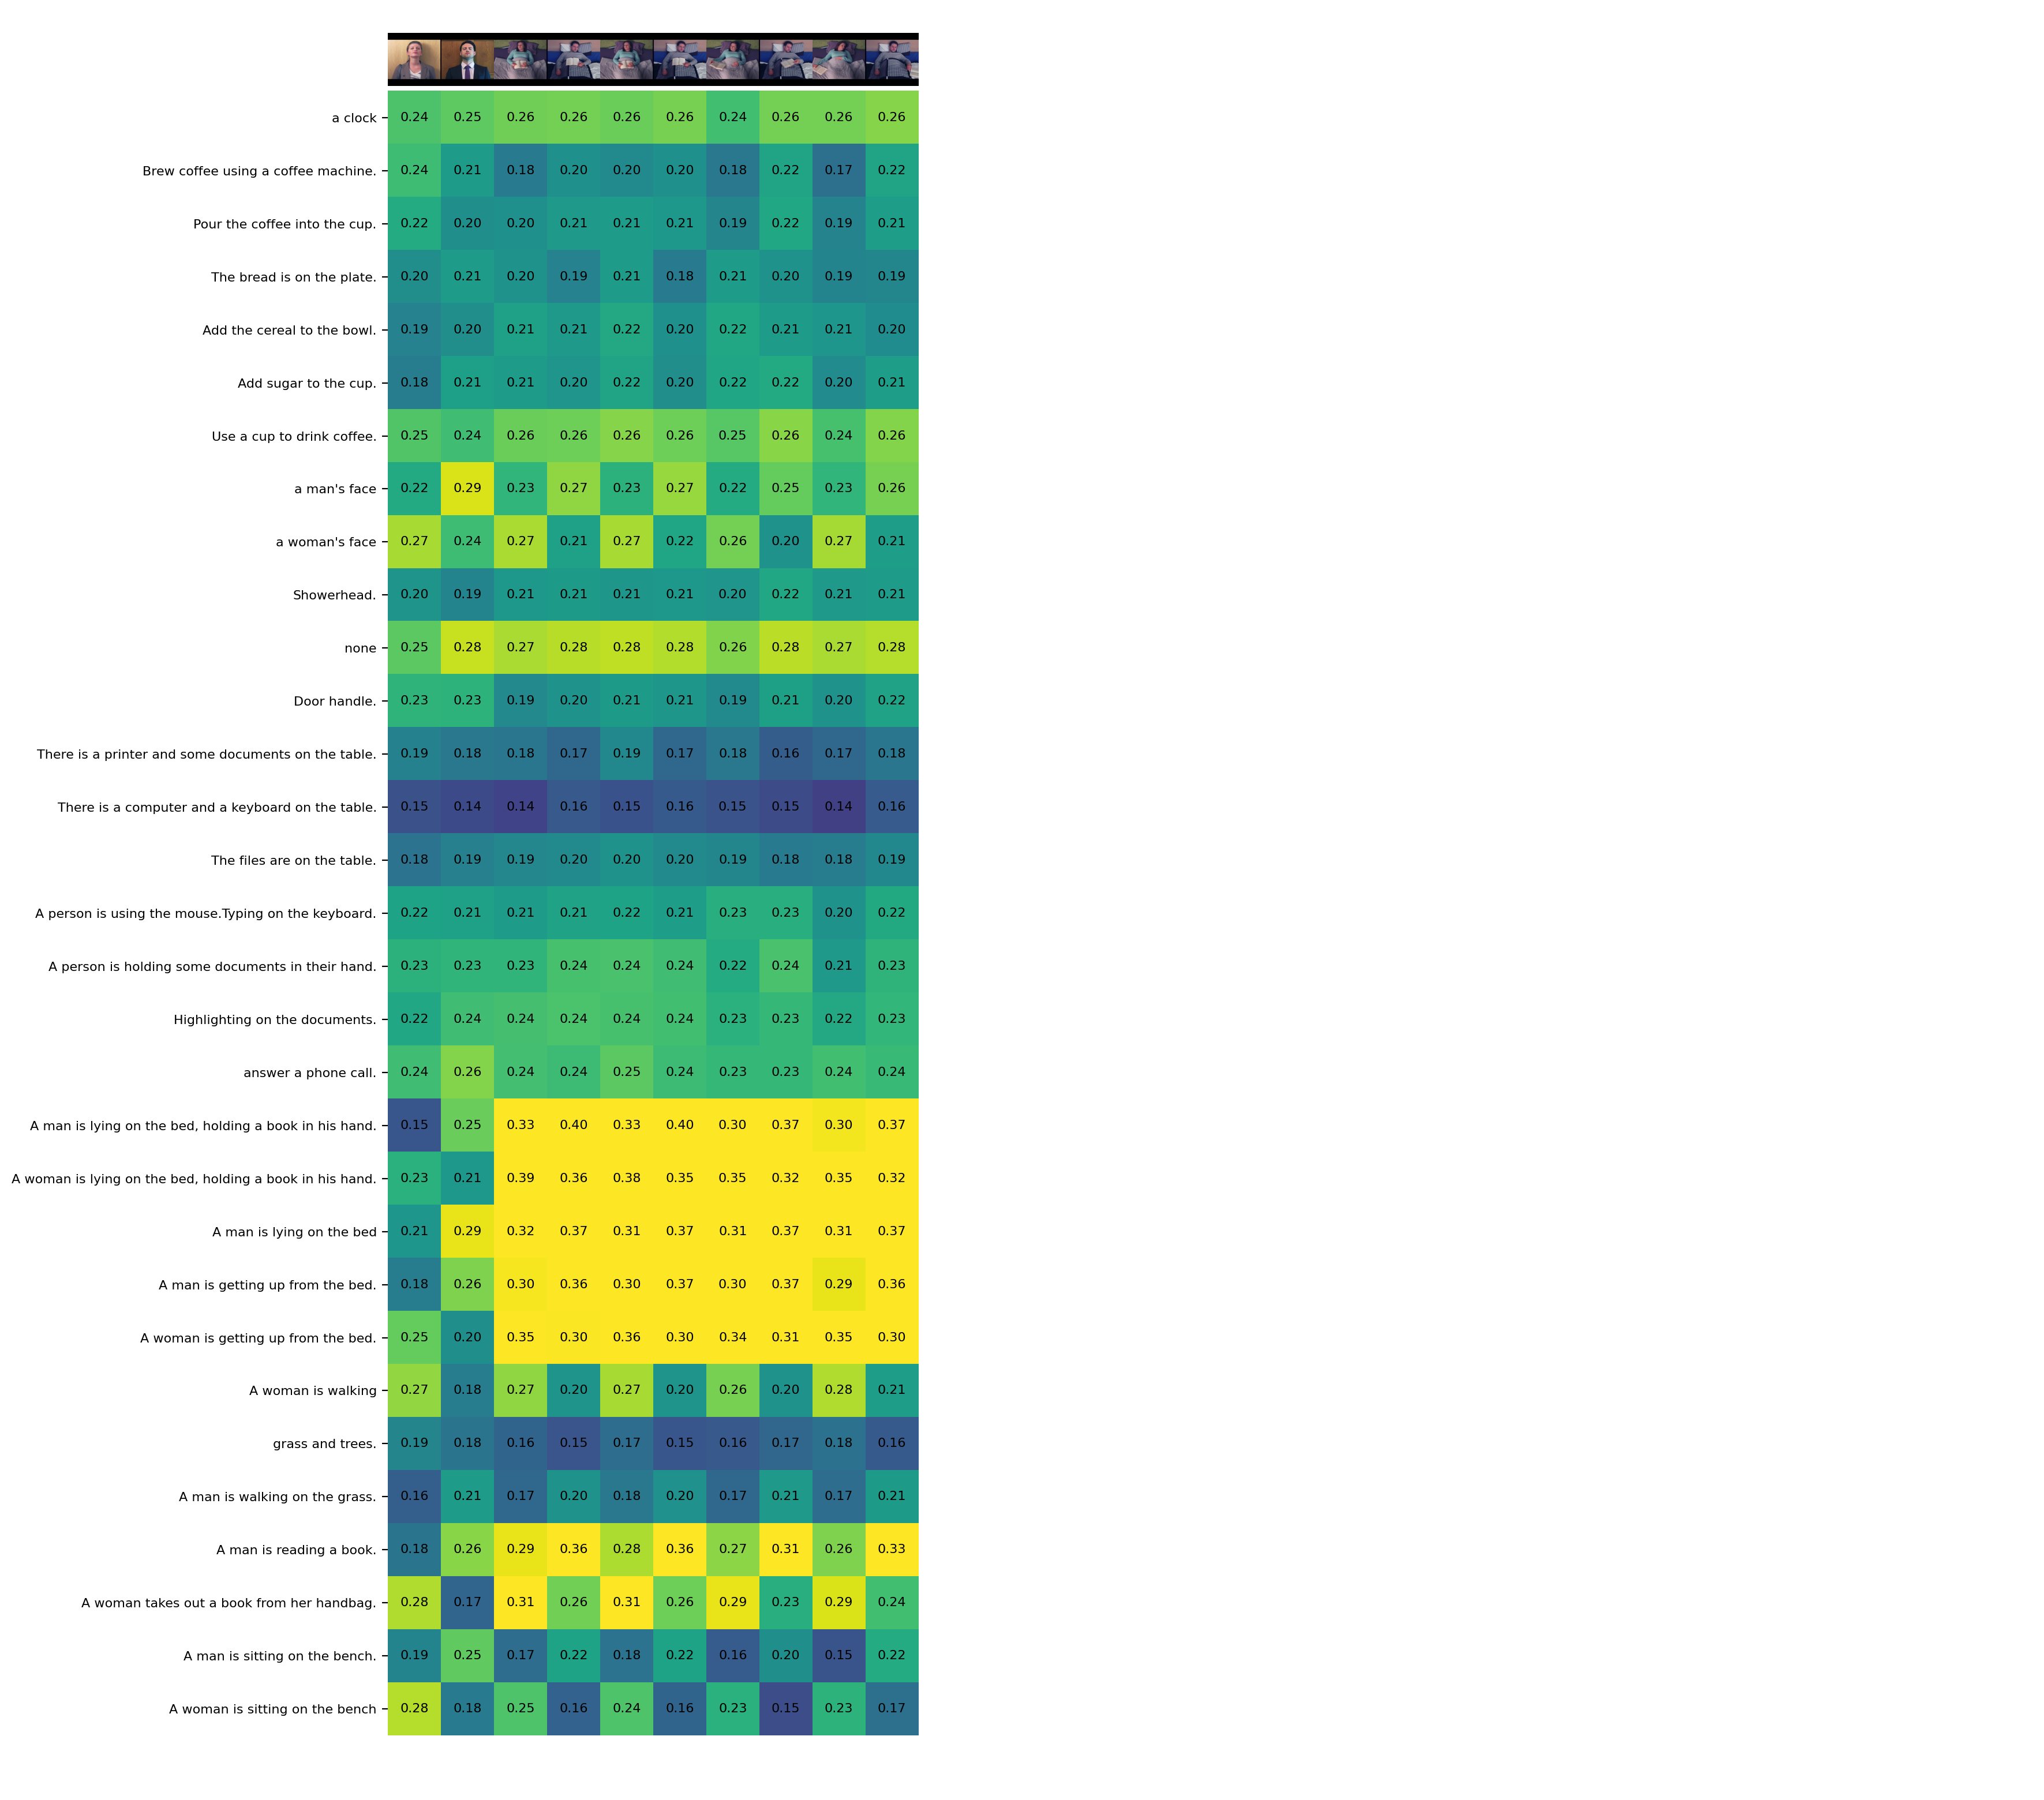

In [ ]:
for i in range(len(interval)-1):
    show_Cosinesimilarity(descriptions, original_images[interval[i]:interval[i+1]], similarity[:, interval[i]:interval[i+1]])
    print('\n')

In [ ]:
if TOP == 1:
    all_description = []
    for i in range(0, similarity.shape[1], 2):
        index1 = np.argmax(similarity[:, i])
        index2 = np.argmax(similarity[:, i+1])

        all_description.append([descriptions[index1], descriptions[index2]])

else:
    all_description = []
    for i in range(0, similarity.shape[1], 2):
        arr1 = similarity[:, i]
        sorted_indices1 = np.argsort(-arr1)
        top3_indices1 = sorted_indices1[:TOP]

        top3_descriptions1 = []
        for id in top3_indices1:
            top3_descriptions1.append(descriptions[id] + ': ' + str(round(arr1[id], 3)))

        arr2 = similarity[:, i+1]
        sorted_indices2 = np.argsort(-arr2)
        top3_indices2 = sorted_indices2[:TOP]

        top3_descriptions2 = []
        for id in top3_indices2:
            top3_descriptions2.append(descriptions[id] + ': ' + str(round(arr2[id], 3)))

        # all_description = [descriptions1, descriptions2]
        # descriptions1 = [top1_des: top1_cos_sim, top2_des: top2_cos_sim, ...]
        all_description.append([top3_descriptions1,  top3_descriptions2])
 

In [ ]:
from PIL import Image

def combine_frames_horizontally(frame1, frame2):
    # Determine the width and height of the frames
    width1, height1 = frame1.size
    width2, height2 = frame2.size

    # Create a new image with a width that can accommodate both frames
    new_width = width1 + width2
    new_height = max(height1, height2)
    combined_image = Image.new('RGB', (new_width, new_height))

    # Paste the first frame on the left side of the combined image
    combined_image.paste(frame1, (0, 0))

    # Paste the second frame on the right side of the combined image
    combined_image.paste(frame2, (width1, 0))

    return combined_image

In [ ]:
from PIL import Image, ImageDraw, ImageFont
import random

def add_description(image, description):
    draw = ImageDraw.Draw(image)
    
    if TOP == 1:
        ''' setting'''
        font_size = 35
        text_color = (255, 255, 255)  # White
        default_font = ImageFont.truetype('Noto_Sans_TC/NotoSansTC-Regular.otf', font_size)
        text_size = draw.textsize(description, font=default_font)

        text_x = (image.width - text_size[0]) // 2
        text_y = (image.height - int(2*text_size[1])) 
        
        draw.text((text_x, text_y), description, font=default_font, fill=text_color)

    else:
        ''' setting'''
        font_size = 25
        text_color = (255, 255, 255)  # White
        default_font = ImageFont.truetype('Noto_Sans_TC/NotoSansTC-Regular.otf', font_size)

        max_text_size = draw.textsize(description[0], font=default_font)
        for i in range(TOP):
            text_size = draw.textsize(description[i], font=default_font)
            if text_size[0] > max_text_size[0]:
                max_text_size = text_size

        top = int(max_text_size[1])
        right = int(max_text_size[0])

        for i in range(TOP):
            text_x = (image.width - right)
            text_y = top * (i+1)

            draw.text((text_x, text_y), description[i], font=default_font, fill=text_color)

    return image

def show_with_description(image, description):
    left = image[:, :image.shape[1]//2]
    frame_rgb1 = cv2.cvtColor(left, cv2.COLOR_BGR2RGB)
    image_left = Image.fromarray(frame_rgb1)
    image1 = add_description(image_left, description[0])

    right = image[:, image.shape[1]//2:]
    frame_rgb2 = cv2.cvtColor(right, cv2.COLOR_BGR2RGB)
    image_right = Image.fromarray(frame_rgb2)
    image2 = add_description(image_right, description[1])

    image = combine_frames_horizontally(image1, image2)
    if random.random() < 0.02:
        image.show()

    return image

In [ ]:
frame_id = [0] + [i for i in range(12, len(all_frames), 24)]
len(frame_id)

In [ ]:
# show_with_description(all_frames[0], all_description[0])


In [ ]:
combine_images = []
for i in range(similarity.shape[1]//2):
    for j in range(frame_id[i], frame_id[i+1]):
        combine_images.append(show_with_description(all_frames[j], all_description[i]))

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
import imageio
from moviepy.editor import * # audio

output_video_path = 'one_minute.mp4'

# Get the original video's frame rate
original_video_path = 'video/One Minute Film/y2mate.com - 6 AM  Film Riot  One Minute Short Contest_1080p.mp4'

video = VideoFileClip(original_video_path) # audio
audio = video.audio # audio
audio.write_audiofile("one_minute.mp3") # audio

original_video = imageio.get_reader(original_video_path)
frame_rate = original_video.get_meta_data()['fps']


imageio.mimsave(output_video_path, combine_images, 'FFMPEG', fps=frame_rate)

video2 = VideoFileClip(output_video_path) # audio
output = video2.set_audio(audio) # audio
output.write_videofile("output.mp4", temp_audiofile="temp-audio.m4a", remove_temp=True, codec="libx264", audio_codec="aac") # audio

MoviePy - Writing audio in one_minute.mp3


MoviePy - Done.


AttributeError: ignored

In [ ]:
import imageio
from moviepy.editor import * # audio

output_video_path = 'video/outout_interpolate.mp4'

# Get the original video's frame rate
original_video_path = 'video/carter_clip1.mp4'

video = VideoFileClip(original_video_path) # audio
audio = video.audio # audio
audio.write_audiofile("carter_audio.mp3") # audio

original_video = imageio.get_reader(original_video_path)
frame_rate = original_video.get_meta_data()['fps']

video2 = VideoFileClip(output_video_path) # audio
output = video2.set_audio(audio) # audio
output.write_videofile("output_carter_audio.mp4", temp_audiofile="temp-audio.m4a", remove_temp=True, codec="libx264", audio_codec="aac") # audio

MoviePy - Writing audio in carter_audio.mp3


MoviePy - Done.
Moviepy - Building video output_carter_audio.mp4.
MoviePy - Writing audio in temp-audio.m4a


MoviePy - Done.
Moviepy - Writing video output_carter_audio.mp4



Moviepy - Done !
Moviepy - video ready output_carter_audio.mp4
